# Método da Bissecção

**A imagem a seguir mostra a expicação teórica do método da bissecção :**

![Teoria](Imagens/Metodo_Bissec%C3%A7%C3%A3o-Teoria.png)

a proxima imagem mostra os passos que o engenheiro deve seguir para aplicar corretamente o método da bissecção

### 1º Passo - Determinação do intervalo

![1ºPasso](Imagens/1%C2%BA%20Passo.png)

Nesse passo atribui-se os valores do intervalo que contem a raíz única a ser descoberta

### 2º Passo - Condições para aplicação do Método

![2ºPasso](Imagens/2%C2%BA%20Passo.png)

Antes de efetuar a aplicação do método, deve-se verificar  3 pontos:

**1. verificar os valores das funções em a e em b**

        o resultado na multiplicação negativo, contribui para garantir que a raíz está dentro do intervalo [a,b].

    
**2. A função deve ser continua dentro do intervalo**

        A continuidade dentro do intervalo garantirá 100% a aplicação do método da bissecação.


**3. A sequência de derivadas para função continua deve gerar sempre o mesmo sinal**

        para a aplicação do método a função deve manter o comportamento crescente ou descrecente dentro do intervalo escolhido. Deriva-se normalmente nas extremidades do intervalo. ambas as funções derivadas em a e b devem possuir o mesmo sinal.

Garantindo o 2º Passo pode-se prosseguir para aplicação do método.

### 3º Passo - Média dos intervalos

![3ºPasso](Imagens/3%C2%BA%20Passo.png)

Encontra o ponto médio entre a e b para, nos proximos passos,se não satisfazer as condições de parada, obter um intervalo cada vez menor que contenha a raiz.

### 4º Passo - Verificação das Condições de parada

![4ºPasso](Imagens/4%C2%BA%20Passo.png)

**São duas condições para determinação da parada:**

**1. Encontrando o valor exato da raíz**

        se o valor da raíz encontrada, f(x), tiver o resultado igual a 0, então o algoritmo é encerrado
**2. Aproximação do valor da raíz**
        
        quando o valor da raíz não é exato o algoritmo tentará aproximar-se da raíz com infinitas iterações, para que não utilize todo o poder do processamento do computador de forma desnecessária, atribui-se um valor aproximado considerado tolerável. para esse valor denominamos tolerância.

***OBS: CASO NENHUMA DAS CONDIÇÕES FOREM SATISFEITAS O ALGORITMO CONTINUA SENDO PROCESSADO, DIMINUINDO O INTERVALO ENTRE a E b, TENTANDO DETERMINAR UMA NOVA POSSÍVEL RAIZ.***

### 5º Passo - Verificar qual valor será atualizado

sabendo o novo possivel valor da raiz, deve-se verificar quais  dos valores de a ou b serão atualizado para repetir o procedimento do algoritmo. quando determinado qual variável será atualizada ela assumirá o novo valor da raiz encontrada. esse procedimento irá diminuir o intervalo até o ponto que atinja uma das condições de parada. então, como saber qual valor será atualizado?

deve-se verificar as seguintes operações:

$$
\begin{aligned}
1.\ f(a) \cdot f(x_{k}) <0 \\   
2.\ f(b) \cdot f(x_{k}) <0
\end{aligned}$$

em relação a 'a': 

Se a multiplicação das funções forem menores que zero, significa que a raiz está entre a e x, logo atualiza b com o valor de x e repete o algoritmo considerando como novo intervalo $[a,b=x]$

em relação a 'b':

Se a multiplicação das funções forem menores que zero, significa que a raiz está entre b e x, logo atualiza a com o valor de x e repete o algoritmo considerando como novo intervalo $[a=x,b]$

# Desenvolvendo o Algoritmo

## Bibliotecas Utilizadas

In [124]:
import sympy as sp #utilizado para realizar o tratamento de equações
import numpy as np # utilizado para realização de operação com matrizes
import matplotlib.pyplot as plt # Utilizada para plotagem gráfica
from IPython.display import Math #Utilizado para imprimir variaveis na tela de forma renderizada


## Funções

In [125]:
#função que retorna resultado das funções ou retorna sua forma em string para ser renderizada em latex


def f(x,tp):
    inp = 'x**3 + log(x,2)'   #<----- insira a função aqui
    trt = inp.split(' ')
    
    if tp == 1:
        for i in range(len(trt)):
            if 'log' in trt[i]:
                trt[i] = 'np.log(x)/np.log('+trt[i][6:-1]+')'

            elif 'sin' in trt[i] or 'cos' in trt[i] or 'tan' in trt[i]:
                trt[i] = 'np.'+ trt[i]
                    
        return eval(' '.join(trt))
            
                                            # caso de uma função não linear, devem ser escritas da seguinte maneira: I - np.sin(x) + 2       |       II - np.log(x,10) + np.log(x,2)

    elif tp ==0:
                                         #a string deve corresponder a mesma função do caso acima, porém escrita da seguinte maneira: I - sin(x) + 2     |   II - log10(x) + log2(x) 
        b = sp.sympify(inp)
        return b

# função utilizada se a função a cima apresentada for não linear

# imprime variaveis renderizadas
def print_latex(eq):
    return display(Math(eq))


## Análise Gráfica


Considerando o Seguinte intervalo:
 [a,b] = [0.4,0.8]
Uma tolerância de
 tol = 0.002
Agora analisa-se o gráfico da função para saber se no intervalo [a,b] ele é contínuo


<string>:1: RuntimeWarning: invalid value encountered in log


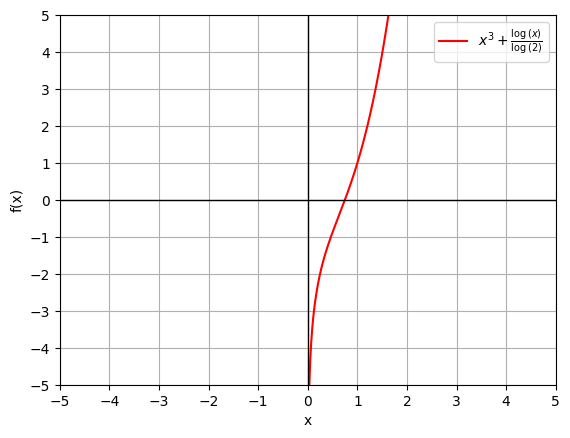

In [126]:


a0 = 0.4  #<------- insira o ponto inicial do intervalo
b0 = 0.8 #<------- insira o ponto final do intervalo
tolerance = 0.002
decimal_places = 4

print('Considerando o Seguinte intervalo:\n [a,b] = [{},{}]'.format(a0, b0))
print('Uma tolerância de\n tol = {}'.format(0.002))
print('Agora analisa-se o gráfico da função para saber se no intervalo [a,b] ele é contínuo')

# determina o domínio da função e as iterações para criar cada ponto no gráfico
x = np.linspace(-10, 10, 1000)

# analisar se o intervalo no qual será aplicado o algoritmo é contínuo

fig, ax = plt.subplots()  # configura a região na qual será apresentado o plot da imagem
ax.grid(True)  # apresenta grade no plot da imagem
ax.plot(x, f(x, 1), color='red', label='$' + sp.latex(f(x, 0)) + '$')  # plota o gráfico e adiciona algumas configurações de legenda ao mesmo
plt.axhline(0, color='black', lw=1)  # acrecenta eixo das abscissas
plt.axvline(0, color='black', lw=1)  # acrescenta o eixo das ordenadas

# modifique esses parametros para ter uma visão geral do gráfico
ax.set_xlim(-5, 5)  # determina o tamanho do eixo x a ser analisado
ax.set_ylim(-5, 5)  # determina o tamanho do eixo y a ser analisado

# Define os intervalos desejados nos eixos x e y
ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1, 1))
ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1, 1))

ax.set_xlabel('x')  # acrescenta legenda para o eixo x
ax.set_ylabel('f(x)')  # acrescenta legenda para o eixo y
ax.legend()  # ativa legenda

plt.show()  # mostra o gráfico após as configurações fornecidas acima


**Se a função no intervalo [a,b] fornecidos são visualmente continuos, então continua o processo do algoritmo.caso contrário, deve-se determinar outra função que seja continua no intervalo, pois ocorrerá um erro durante a aplicação do método da bissecção**

Analisando se a derivada no intervalo ela é constante, usando a e b como referência:
Derivada da função: 


<IPython.core.display.Math object>

derivada em a: 


<IPython.core.display.Math object>

derivada em b: 


<IPython.core.display.Math object>

A derivada é sempre crescente, logo o intervalo é válido


<string>:1: RuntimeWarning: invalid value encountered in log


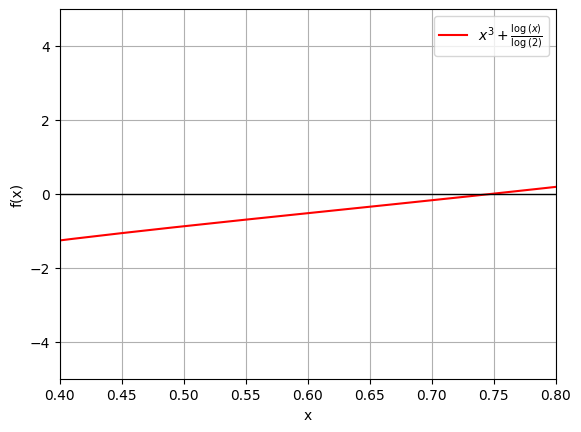

In [127]:
print('Analisando se a derivada no intervalo ela é constante, usando a e b como referência:')
#determina a variável da função para realização de tratamento da função com a bilbioteca sympy
x = sp.symbols('x')
#obtem a derivada da função
derivada_f = sp.diff(f(x,0),x)

print('Derivada da função: ')
print_latex("f'(x) = "+sp.latex(derivada_f))
while True:
    # verifica se as funções derivadas em a e b são negativas
    if (derivada_f.subs(x,a0)) < 0 and derivada_f.subs(x,b0) <0:
        print('derivada em a: ')
        print_latex("f'("+str(a0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a0)+')')+ " = " + str(round(derivada_f.subs(x,a0),decimal_places)))
        print('derivada em b: ')
        print_latex("f'("+str(b0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b0)+')')+ " = " + str(round(derivada_f.subs(x,b0),decimal_places)))
        print('A derivada é sempre descrescente, logo o intervalo é válido')

    #verifica se as funções derivadas de a e b são negativas
    elif (derivada_f.subs(x,a0)) > 0 and derivada_f.subs(x,b0) >0:
        print('derivada em a: ')
        print_latex("f'("+str(a0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a0)+')')+ " = " + str(round(derivada_f.subs(x,a0),decimal_places)))
        print('derivada em b: ')
        print_latex("f'("+str(b0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b0)+')')+ " = " + str(round(derivada_f.subs(x,b0),decimal_places)))
        print('A derivada é sempre crescente, logo o intervalo é válido')

    #verifica se as funções derivadas de a e b não satisfazem as duas condições  acima
    else:
        print('derivada em a: ')
        print_latex("f'("+str(a0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(a0)+')')+ " = " + str(derivada_f.subs(x,a0)))
        print('derivada em b: ')
        print_latex("f'("+str(b0)+")" + " = " +str(sp.latex(derivada_f)).replace('x','('+str(b0)+')')+ " = " + str(derivada_f.subs(x,b0)))
        print('A forma da função varia ao longo do intervalo, logo o intervalo é inválido. Determine outro intervalo')
        break
            


    x = np.linspace(-10,10,1000)
    fig,ax = plt.subplots()
    ax.grid(True)
    ax.plot(x,f(x,1),color='red', label='$'+sp.latex(f(x,0))+'$')
    plt.axhline(0, color='black', lw=1)
    plt.axvline(0, color='black', lw=1)

    #modifique esses parametros para verificar se o grafico é continuo nos intervalos iniciais fornecidos
    ax.set_xlim(a0,b0) # determina o tamanho dos eixos x e y a serem analisados
    ax.set_ylim(-5,5) # determina o tamanho dos eixos x e y a serem analisados
        
    ax.set_xlabel('x')
    ax.set_ylabel('f(x)')
    ax.legend()

    plt.show()

    break

**Para efetuar a aplicação do algoritmo a derivada da função proximo ao local onde está localizada a raíz seve ser sempre crescente ou sempre descrescente no intervalo. Matematicamente falando, a derivada da função proximo no intervalo deve ser constante.**

**se a derivada é constante então continue com a aplicação do algoritmo. Caso contrário, escolha outra função que a derivada seja constante no intervalo, pois ocorrerá um erro na aplicação do método da bissecção.**

## Aplicando Algoritmo

In [128]:
# Aplicando o algoritmo da bissecção



print('fazendo:',end='')
print_latex('f(a) \cdot f(b)')
print('temos então:')
# verifica se as funções de a e b são negativas para garantir que a raiz está entre o intervalo [a,b]
if f(a0,1)*f(b0,1) <0:

    print_latex('f('+str(a0)+')' '\cdot f('+str(b0)+')' '='+ '['+ sp.latex(f(x,0)).replace('x','('+str(a0)+')')+']' + '\cdot' +'['+ sp.latex(f(x,0)).replace('x','('+str(b0)+')')+']'+ " = "+str((f(a0,1)*f(b0,1))))
    print('Ou seja, os intervalos aplicados inicialmente são válidos, pois:',end=' ')
    print_latex('f(a) \cdot f(b) < 0')
    
#Caso contrário
else:
    print_latex('f('+str(a0)+')' '\cdot f('+str(b0)+')' '='+ '['+sp.latex(f(x,0)).replace('x','('+str(a0)+')')+']'+ '\cdot'+'['+sp.latex(f(x,0)).replace('x','('+str(b0)+')')+']'+' = '+ str((f(a0,1)*f(b0,1))))
    print('Ou seja, os intervalos aplicados inicialmente NÃO são válidos, pois:',end=' ')
    print_latex('f(a) \cdot f(b) > 0')
    print('Deve-se escolher outra [a,b] pois esse intervalo é inválido')


fazendo:

<IPython.core.display.Math object>

temos então:


<IPython.core.display.Math object>

Ou seja, os intervalos aplicados inicialmente são válidos, pois: 

<IPython.core.display.Math object>

In [129]:
interation = 1 # variável utilizada para verificar quatas iterações foram necessárias para o algoritmo
results = [] # vetor utilizado para construir tabela robusta com as informações das variaveis em cada iteração


while True:
    print('efetuando os cálculos: ')
    print("{}º iteração: ".format(interation))

    #calcula o valor da raiz
    x = round((a0 + b0)/2,decimal_places)

    print_latex('x_{'+str(interation)+'} = {(a_0 + b_0)\over 2} = {('+str(a0)+' + '+str(b0)+')\over 2} = ' + str(x))

    print('verificando condição de parada: ')

    #verifica se a condição de parada é satisfeita
    if abs(round(f(x,1),decimal_places)) <= tolerance or f(x,1) == 0:
        print_latex('f('+str(x)+') = '+ sp.latex(f(x,0)).replace('x',str(x)) + ' = '+ sp.latex(round(f(x,1),decimal_places)))
        print_latex('|f(x_{'+str(interation)+'})|' + '\leq' + str(tolerance))
        print_latex(sp.latex(abs(round((f(x,1)),decimal_places))) + '\leq ' + str(tolerance))
        print("Dessa forma, a condição  de parada foi satisfeita")

        #armazena as informações das variaveis para iteração atual
        results.append([interation, round(a0,decimal_places), round(b0,decimal_places), round(f(a0,1),decimal_places), round(f(b0,1),decimal_places), round(x,decimal_places), abs(round(f(x,1),decimal_places))])
        break

    #Caso contrário
    elif abs(round(f(x,1),decimal_places)) > tolerance:
        print_latex('f('+str(x)+') = '+ sp.latex(f(x,0)).replace('x',str(x)) + ' = '+ sp.latex(round(f(x,1),decimal_places)))
        print_latex('|f('+str(x)+')|' + '>' + str(tolerance))
        print_latex(sp.latex(abs(round(f(x,1),decimal_places))) + '>' + str(tolerance))

        #armazena as informações das variaveis para iteração atual
        results.append([interation, round(a0,decimal_places), round(b0,decimal_places), round(f(a0,1),decimal_places), round(f(b0,1),decimal_places), round(x,decimal_places), abs(round(f(x,1),decimal_places))])

        print('dessa forma um novo intervalo deve ser determinado: ') 

        #verifica se a variavel b será atualizada
        if f(a0,1)*f(x,1) < 0:
            print('como a relação: ')
            print_latex(f'f(a_{interation-1})'+ '\cdot f(x_{'+str(interation)+'}) < 0')
            print('então b será atualizado. Dessa forma tem-se:')
            a0 = a0
            b0 = x
            print_latex(f"a_{interation} = a_{interation-1} ="+str(a0))
            print_latex(f'b_{interation} =' +'x_{'+str(interation)+'} = '+str(x))

        #verifica se a será atualizado
        elif f(b0,1)*f(x,1) < 0:
            print('como a relação: ')
            print_latex(f'f(b_{interation-1})'+ '\cdot f(x_{'+str(interation)+'}) < 0')
            print('então a será atualizado. Dessa forma tem-se:')
            b0 = b0
            a0 = x
            print_latex(f'a_{interation} =' +'x_{'+str(interation)+'} = '+str(x))
            print_latex(f'b_{interation} = b_{interation-1} = '+str(b0))

    
    
    
    #soma 1 a interation a cada fim de iteração 
    interation+=1

    #finaliza o while True em caso de iterações indeterminadas
    if interation > 40:
        break






efetuando os cálculos: 
1º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
2º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
3º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então b será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
4º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
5º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
6º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
7º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

dessa forma um novo intervalo deve ser determinado: 
como a relação: 


<IPython.core.display.Math object>

então a será atualizado. Dessa forma tem-se:


<IPython.core.display.Math object>

<IPython.core.display.Math object>

efetuando os cálculos: 
8º iteração: 


<IPython.core.display.Math object>

verificando condição de parada: 


<IPython.core.display.Math object>

<IPython.core.display.Math object>

<IPython.core.display.Math object>

Dessa forma, a condição  de parada foi satisfeita


In [130]:
from tabulate import tabulate #biblioteca que criar uma tabela robusta com print

train_data_element = tabulate(results, headers=['K', 'a_k', 'b_k', 'f(a_k)', 'f(b_k)', 'x_k+1','|f(x_k+1)|'], tablefmt='heavy_grid') #importa os dados obtidos com results para impressão em uma tabela


In [131]:
print(train_data_element)

┏━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━━━┓
┃   K ┃    a_k ┃   b_k ┃   f(a_k) ┃   f(b_k) ┃   x_k+1 ┃   |f(x_k+1)| ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   1 ┃ 0.4    ┃  0.8  ┃  -1.2579 ┃   0.1901 ┃  0.6    ┃       0.521  ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   2 ┃ 0.6    ┃  0.8  ┃  -0.521  ┃   0.1901 ┃  0.7    ┃       0.1716 ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   3 ┃ 0.7    ┃  0.8  ┃  -0.1716 ┃   0.1901 ┃  0.75   ┃       0.0068 ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   4 ┃ 0.7    ┃  0.75 ┃  -0.1716 ┃   0.0068 ┃  0.725  ┃       0.0829 ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   5 ┃ 0.725  ┃  0.75 ┃  -0.0829 ┃   0.0068 ┃  0.7375 ┃       0.0382 ┃
┣━━━━━╋━━━━━━━━╋━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━━╋━━━━━━━━━╋━━━━━━━━━━━━━━┫
┃   6 ┃ 0.7375 ┃  0.75 ┃  -0.0382 ┃   0.0068 ┃  0.7438 ┃       0